<a href="https://colab.research.google.com/github/khp53/Credit-Card-Fraud-Detection-SecureBoost/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.evaluation.single_table import run_diagnostic
import numpy as np
import datetime as dt

In [2]:
# Load or create a dataset
real_data = pd.read_csv('creditcard.csv')

# We will need additional metadata as this dataset does not include much valuable metadata
# For PCA complience all of them are encrypted.

# External Metadata
merchant_category = ["Grocery", "Electronics", "Clothing", "Travel", "Restaurants"]
real_data["Merchant Category"] = np.random.choice(merchant_category, size=len(real_data))

device_type = ["Mobile", "Desktop", "Tablet"]
real_data["Device Type"] = np.random.choice(device_type, size=len(real_data))

locations = ["City A", "City B", "City C"]
real_data["Location"] = np.random.choice(locations, size=len(real_data))

# HEre we are using the existing time values from our real_data to calculate a time stamp for metadata
timestamp_start = dt.datetime(2022, 11, 14)
real_data["Transaction Timestamp"] = real_data["Time"].apply(lambda x: timestamp_start + dt.timedelta(days=x))

payment_methods = ["Credit Card", "Debit Card", "Apple Pay", "Google Pay", "Interact"]
real_data["Payment Method"] = np.random.choice(payment_methods, size=len(real_data))

channel = ["Online", "In-Store", "POS"]
real_data["Channel"] = np.random.choice(channel, size=len(real_data))

season = ["Winter", "Spring", "Summer", "Holiday"]
real_data["Season"] = np.random.choice(season, size=len(real_data))

card_types = ["Visa", "MasterCard", "American Express", "Discover"]
real_data["Card Type"] = np.random.choice(card_types, size=len(real_data))

real_data["Credit Limit"] = np.random.uniform(1000, 10000, size=len(real_data))
real_data["Cardholder Risk Score"] = np.random.uniform(300, 850, size=len(real_data))
real_data["Number of Active Cards"] = np.random.randint(1, 5, size=len(real_data))
real_data["Loyalty Points Available"] = np.random.randint(0, 5000, size=len(real_data))

In [3]:
def generate_card_id(card_type):
    if card_type == 'Visa':
        return '4' + ''.join(np.random.choice(list('0123456789'), size=15))
    elif card_type == 'MasterCard':
        prefix = np.random.choice(['51', '52', '53', '54', '55'] + [str(i) for i in range(2221, 2721)])
        return prefix + ''.join(np.random.choice(list('0123456789'), size=16-len(prefix)))
    elif card_type == 'American Express':
        prefix = np.random.choice(['34', '37'])
        return prefix + ''.join(np.random.choice(list('0123456789'), size=13))
    elif card_type == 'Discover':
        prefix = np.random.choice(['6011'] + [str(i) for i in range(622126, 622926)] + ['644', '645', '646', '647', '648', '649', '65'])
        return prefix + ''.join(np.random.choice(list('0123456789'), size=16-len(prefix)))
    else:
        return None

In [4]:
real_data['Card ID'] = real_data['Card Type'].apply(generate_card_id)

In [5]:
real_data.to_csv("augmented_creditcard.csv", index=False)

NameError: name 'real_data' is not defined

In [6]:
from sdv.metadata import SingleTableMetadata

augmented_data = pd.read_csv("augmented_creditcard.csv")

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(augmented_data)

print(metadata.to_dict())

# Save metadata to json for later reading
metadata.save_to_json("creditcard_metadata.json")
print("Metadata saved!")

{'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1', 'columns': {'Time': {'sdtype': 'numerical'}, 'V1': {'sdtype': 'numerical'}, 'V2': {'sdtype': 'numerical'}, 'V3': {'sdtype': 'numerical'}, 'V4': {'sdtype': 'numerical'}, 'V5': {'sdtype': 'numerical'}, 'V6': {'sdtype': 'numerical'}, 'V7': {'sdtype': 'numerical'}, 'V8': {'sdtype': 'numerical'}, 'V9': {'sdtype': 'numerical'}, 'V10': {'sdtype': 'numerical'}, 'V11': {'sdtype': 'numerical'}, 'V12': {'sdtype': 'numerical'}, 'V13': {'sdtype': 'numerical'}, 'V14': {'sdtype': 'numerical'}, 'V15': {'sdtype': 'numerical'}, 'V16': {'sdtype': 'numerical'}, 'V17': {'sdtype': 'numerical'}, 'V18': {'sdtype': 'numerical'}, 'V19': {'sdtype': 'numerical'}, 'V20': {'sdtype': 'numerical'}, 'V21': {'sdtype': 'numerical'}, 'V22': {'sdtype': 'numerical'}, 'V23': {'sdtype': 'numerical'}, 'V24': {'sdtype': 'numerical'}, 'V25': {'sdtype': 'numerical'}, 'V26': {'sdtype': 'numerical'}, 'V27': {'sdtype': 'numerical'}, 'V28': {'sdtype': 'numerical'}, 'Amount': {'sdtype': 'n

In [7]:
json_metadata = SingleTableMetadata.load_from_json("creditcard_metadata.json")

synthesizer = CTGANSynthesizer(json_metadata, epochs=100,
    verbose=True)
reduced_data = augmented_data.sample(frac=0.3, random_state=56)
synthesizer.fit(reduced_data)

synthetic_data = synthesizer.sample(num_rows=len(reduced_data))
print(synthetic_data.head(5))

synthetic_data.to_csv("synthetic_creditcard.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
Gen. (-6.12) | Discrim. (-0.04): 100%|██████████| 100/100 [1:14:48<00:00, 44.89s/it]


      Time        V1        V2        V3        V4        V5        V6  \
0  68183.0 -2.555683  1.046685  1.020982  1.566225  3.022399  1.321870   
1  71429.0  1.315486 -0.371440 -0.070024  0.281124  0.334142  0.887258   
2  51993.0 -0.947109  1.290269  0.083987 -0.652643  1.661304 -0.653085   
3  64155.0 -0.302848  1.081142  0.568993  2.189436  1.593832  0.074635   
4  74694.0  2.004417 -0.660734 -0.561478 -0.188918  0.360716 -0.743623   

         V7        V8        V9  ...  Transaction Timestamp  Payment Method  \
0  1.108944 -0.072699 -0.509197  ...          sdv-pii-24p3x      Debit Card   
1  0.183357  0.269768  1.117159  ...          sdv-pii-ngu20      Debit Card   
2  0.879837 -0.047507 -0.120699  ...          sdv-pii-kp3sm      Google Pay   
3  0.624375  0.803518 -0.288782  ...          sdv-pii-u659p       Apple Pay   
4  0.224457  0.000284 -0.476166  ...          sdv-pii-ltoow       Apple Pay   

    Channel  Season         Card Type  Credit Limit  Cardholder Risk Score  \
0 

In [7]:
from sdv.evaluation.single_table import run_diagnostic

synthetic_data_from_file = pd.read_csv("synthetic_creditcard.csv")

diagnostic = run_diagnostic(
    real_data=augmented_data,
    synthetic_data=synthetic_data_from_file,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 44/44 [00:01<00:00, 39.24it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 137.72it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [8]:
# Data partitioning
ecommerce_data = augmented_data.sample(frac=0.6, random_state=42)  # 60% data for e-commerce
bank_data = augmented_data.drop(ecommerce_data.index)

ecommerce_card_type_distribution = {
    'Visa': 0.5,
    'MasterCard': 0.35,
    'American Express': 0.1,
    'Discover': 0.05
}

bank_card_type_distribution = {
    'Visa': 0.4,
    'MasterCard': 0.3,
    'American Express': 0.15,
    'Discover': 0.15
}

ecommerce_data['Card Type'] = ecommerce_data['Card Type'].apply(
    lambda _: np.random.choice(
        list(ecommerce_card_type_distribution.keys()),
        p=list(ecommerce_card_type_distribution.values())
    )
)

bank_data['Card Type'] = bank_data['Card Type'].apply(
    lambda _: np.random.choice(
        list(bank_card_type_distribution.keys()),
        p=list(bank_card_type_distribution.values())
    )
)

ecommerce_data.to_csv("ecommerce_data_with_card_ids.csv", index=False)
bank_data.to_csv("bank_data_with_card_ids.csv", index=False)

In [9]:
bank_data = pd.read_csv("bank_data_with_card_ids.csv")
ecommerce_data = pd.read_csv("ecommerce_data_with_card_ids.csv")

In [10]:
bank_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Transaction Timestamp,Payment Method,Channel,Season,Card Type,Credit Limit,Cardholder Risk Score,Number of Active Cards,Loyalty Points Available,Card ID
0,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,2022-11-15 00:00:00,Google Pay,In-Store,Spring,Visa,9157.205864,836.003688,3,1898,4238466689369820
1,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,2022-11-16 00:00:00,Interact,Online,Holiday,American Express,1753.406678,394.614626,1,2197,4374050687836507
2,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,2022-11-21 00:00:00,Apple Pay,POS,Spring,Visa,9333.146354,539.869302,3,2951,4609915614549792
3,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,2022-11-21 00:00:00,Debit Card,Online,Holiday,MasterCard,6570.930425,805.235368,2,2102,377107141539108
4,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,2022-11-23 00:00:00,Debit Card,POS,Summer,MasterCard,8886.073643,519.431986,1,2371,348494335824959


In [11]:
ecommerce_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Transaction Timestamp,Payment Method,Channel,Season,Card Type,Credit Limit,Cardholder Risk Score,Number of Active Cards,Loyalty Points Available,Card ID
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,2136-07-04 00:00:00,Google Pay,In-Store,Holiday,Visa,2218.379462,544.304421,4,4837,4915905659223210
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,2144-01-20 00:00:00,Credit Card,POS,Summer,MasterCard,1159.079796,452.143315,1,3725,4535824065109795
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,2120-01-09 00:00:00,Google Pay,POS,Holiday,MasterCard,9503.026111,810.190303,4,3168,2416447274555273
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,2480-06-08 00:00:00,Credit Card,POS,Winter,Visa,2695.040233,804.903729,1,4836,343908162079331
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,2484-02-18 00:00:00,Google Pay,Online,Spring,MasterCard,4058.237637,430.841984,2,4045,2568552414016593


In [13]:
bank_data.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class', 'Merchant Category', 'Device Type',
       'Location', 'Transaction Timestamp', 'Payment Method', 'Channel',
       'Season', 'Card Type', 'Credit Limit', 'Cardholder Risk Score',
       'Number of Active Cards', 'Loyalty Points Available', 'Card ID'],
      dtype=object)

In [ ]:
bank_data.drop(columns=['Merchant Category', 'Device Type', 'Location', 'Transaction Timestamp', 'Payment Method', 'Channel',
       'Season'], axis=1, inplace=True)

In [16]:
bank_data.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class', 'Card Type', 'Credit Limit',
       'Cardholder Risk Score', 'Number of Active Cards',
       'Loyalty Points Available', 'Card ID'], dtype=object)

In [17]:
ecommerce_data.drop(columns=['Credit Limit', 'Cardholder Risk Score',
       'Number of Active Cards', 'Loyalty Points Available'], axis=1, inplace=True)

In [18]:
ecommerce_data.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class', 'Merchant Category', 'Device Type',
       'Location', 'Transaction Timestamp', 'Payment Method', 'Channel',
       'Season', 'Card Type', 'Card ID'], dtype=object)

In [20]:
import hashlib

# Function to hash the Card ID
def hash_id(card_id):
    return hashlib.sha256(str(card_id).encode()).hexdigest()

# Hash Card ID in both datasets
bank_data["Card ID"] = bank_data["Card ID"].apply(hash_id)
ecommerce_data["Card ID"] = ecommerce_data["Card ID"].apply(hash_id)

In [22]:
bank_data.to_csv("bank_data_with_processed_hashed_card_ids.csv")
ecommerce_data.to_csv("ecommerce_data_with_processed_hashed_card_ids.csv")

Data Preprocessing

Check for distrubition of PCA features V1 to V28, they should be already standarized but I am checking to ensure.

In [23]:
# Get a statistical summary of V1 to V28
pca_columns = [f'V{i}' for i in range(1, 29)]
bank_data[pca_columns].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,...,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000
mean,-0.006738,-0.008655,0.003731,0.001874,-0.000841,0.001247,0.000536,0.000986,0.001816,-0.002100,...,0.001141,-0.001430,-0.000283,-0.000348,-0.001706,0.000583,-0.002219,-0.000455,-0.001163,-0.000978
std,1.974824,1.694260,1.516741,1.419430,1.411961,1.345936,1.264728,1.172584,1.098964,1.085971,...,0.814020,0.801285,0.726411,0.724930,0.651455,0.605726,0.524463,0.483154,0.415711,0.335937
min,-56.407510,-72.715728,-48.325589,-5.416315,-113.743307,-26.160506,-43.557242,-50.943369,-13.320155,-24.588262,...,-7.213527,-54.497720,-22.797604,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.543518,-15.430084
25%,-0.922874,-0.604462,-0.887243,-0.847584,-0.692946,-0.765490,-0.553536,-0.207105,-0.640983,-0.536856,...,-0.455010,-0.213383,-0.228064,-0.541031,-0.161622,-0.353727,-0.318051,-0.328301,-0.071070,-0.053484
50%,0.007740,0.064892,0.183419,-0.020854,-0.061220,-0.271449,0.041139,0.023503,-0.049272,-0.094356,...,0.006774,-0.063103,-0.029181,0.005257,-0.010978,0.042323,0.014101,-0.052759,0.001361,0.011232
75%,1.313428,0.803739,1.031976,0.746728,0.606402,0.398266,0.570893,0.327837,0.600250,0.453923,...,0.461350,0.132245,0.186390,0.527198,0.147451,0.441050,0.349396,0.242788,0.091138,0.078528
max,2.454930,22.057729,4.101716,16.875344,34.801666,73.301626,120.589494,20.007208,10.326133,15.245686,...,5.591971,39.420904,22.614889,8.316275,22.528412,4.584549,5.852484,3.415636,31.612198,33.847808


Observation from description:

The mean for V1 to V28 is close to 0, which aligns with expectations for PCA-transformed data.

The standard deviation (std) varies across components. While some are close to 1, others deviate significantly (e.g., V1 has std ≈ 1.97, V2 ≈ 1.69, and so on). This suggests that the PCA components are not uniformly scaled, which could affect models sensitive to feature magnitudes.

The min/max values for certain features indicate the presence of extreme outliers. For example:
V4 has a minimum of -113.74 and a maximum of 34.80.
V7 has a maximum of 120.59.
These extreme values may skew the distributions and impact model performance if left unhandled.

Creating density plots to check if they center around 0 with similar shapes.

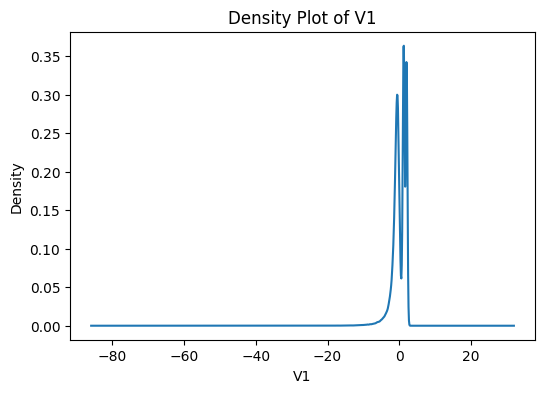

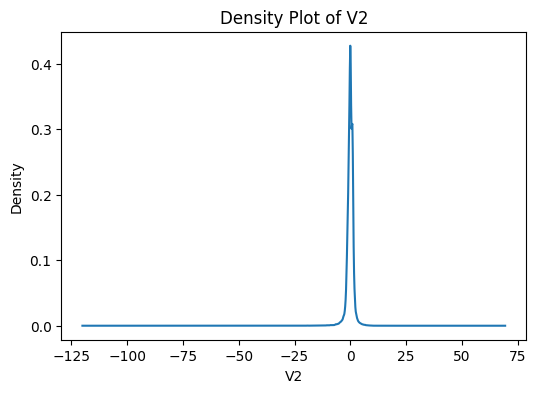

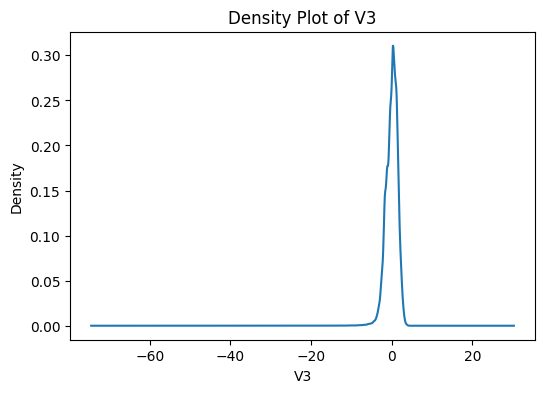

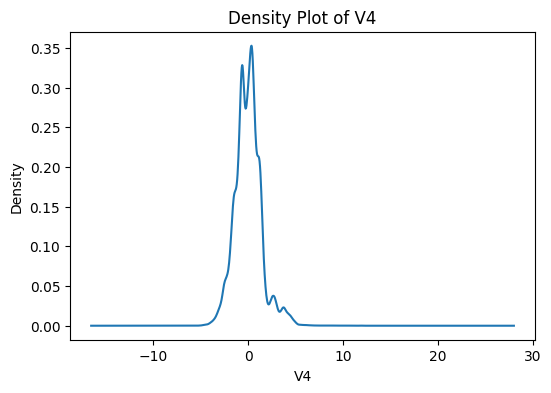

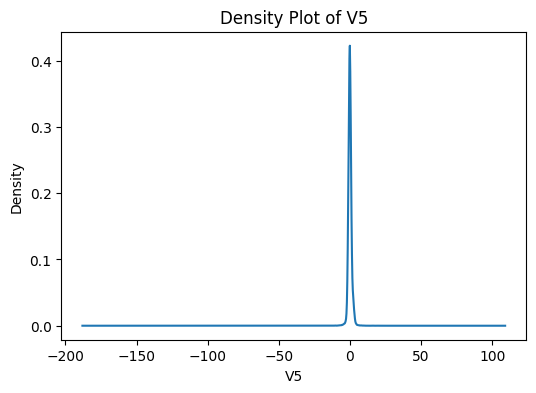

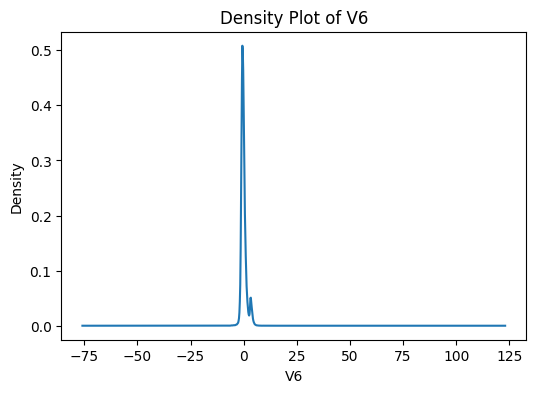

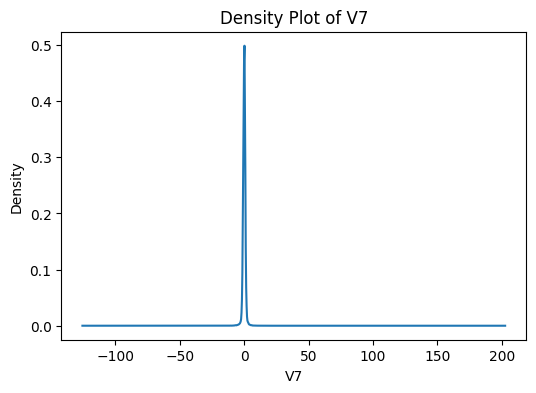

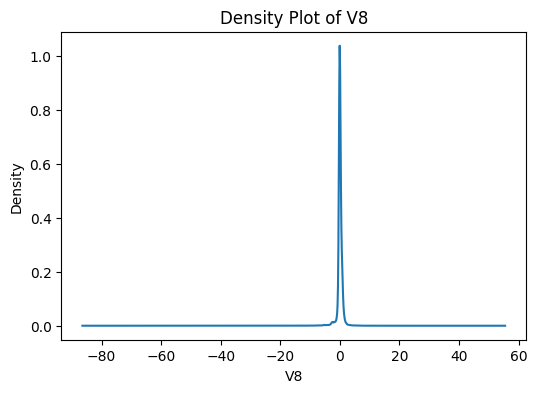

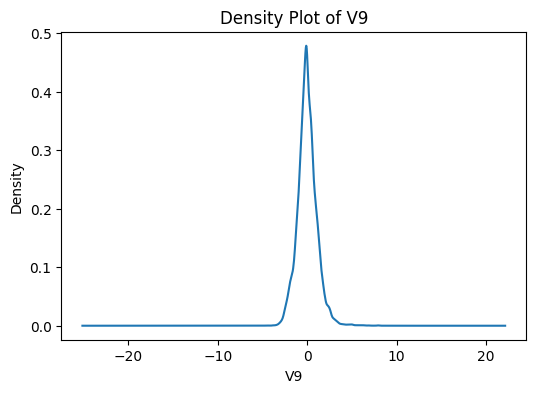

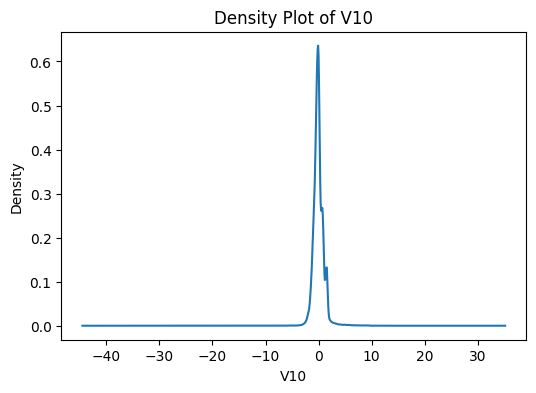

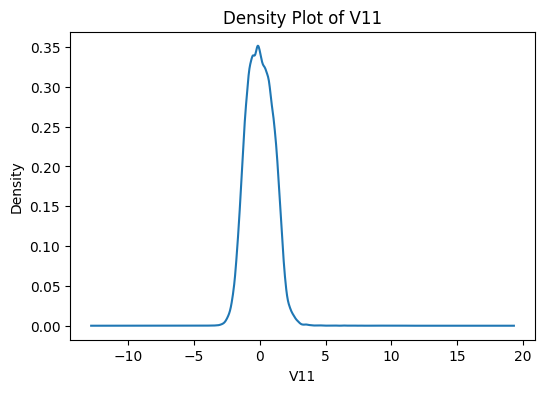

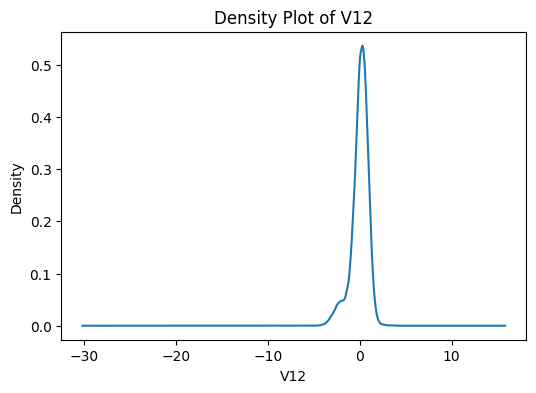

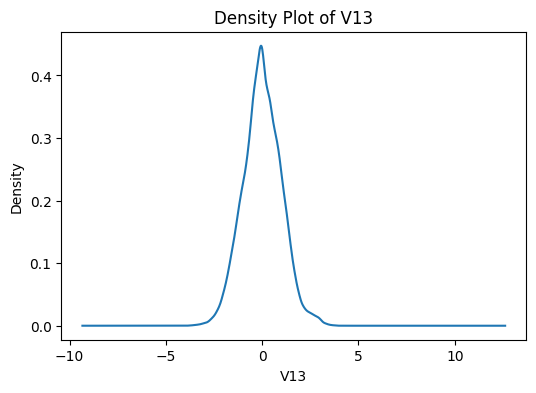

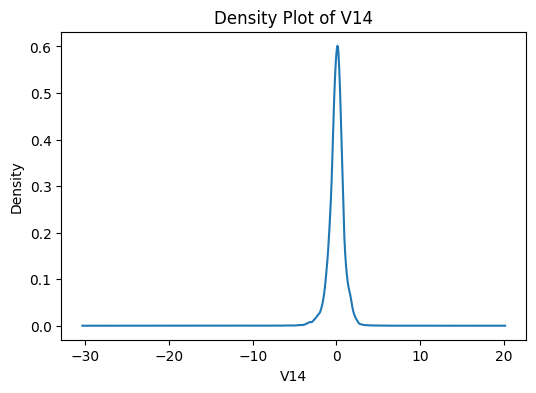

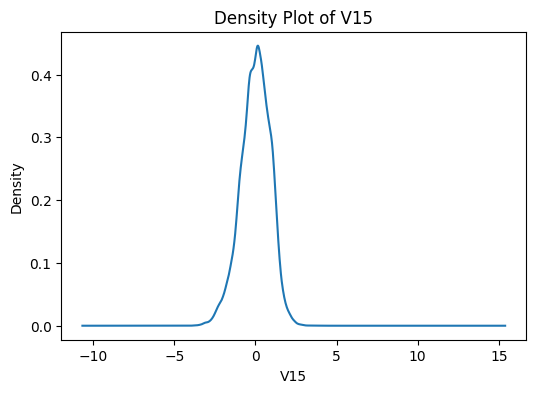

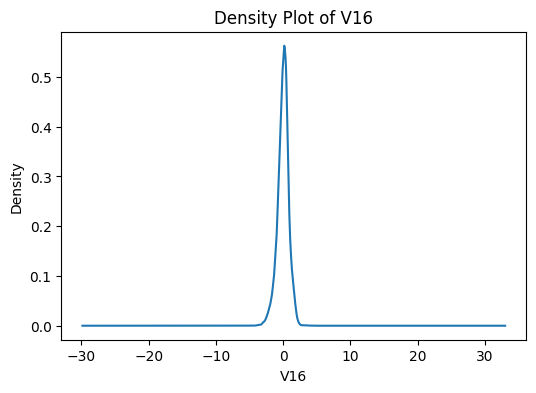

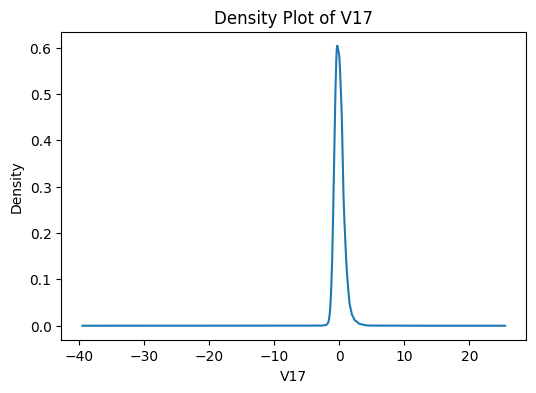

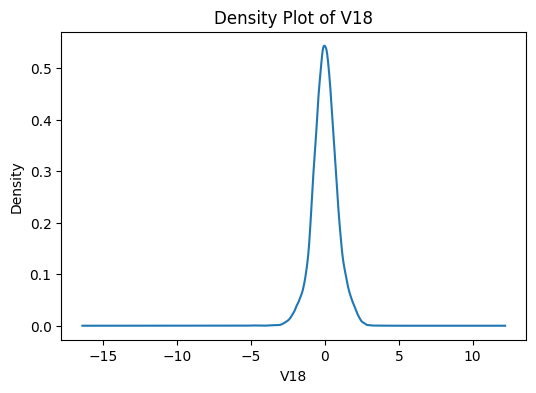

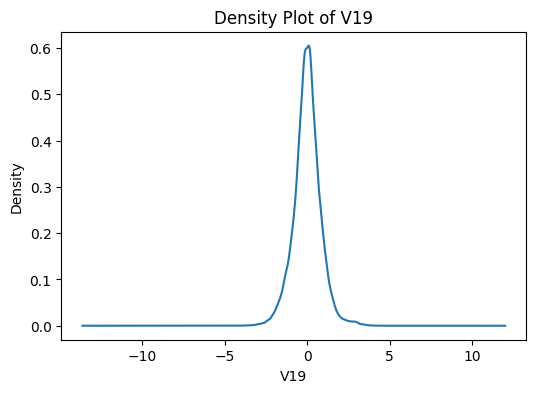

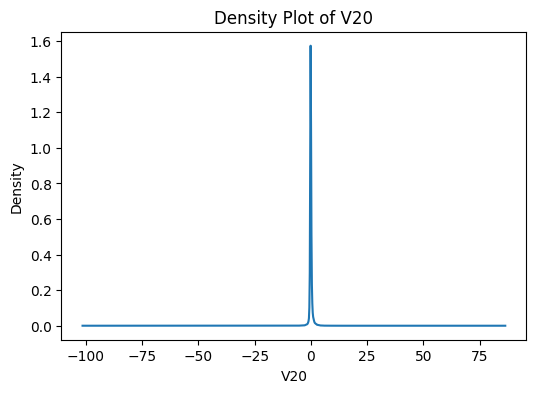

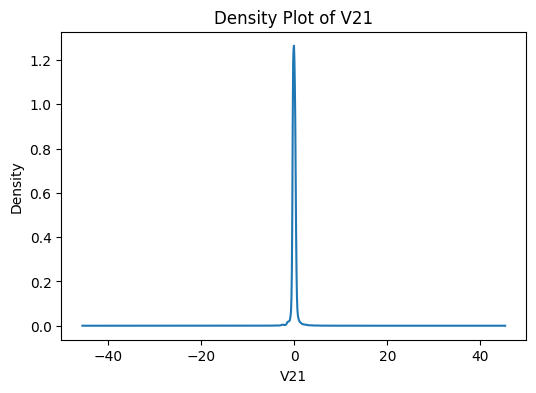

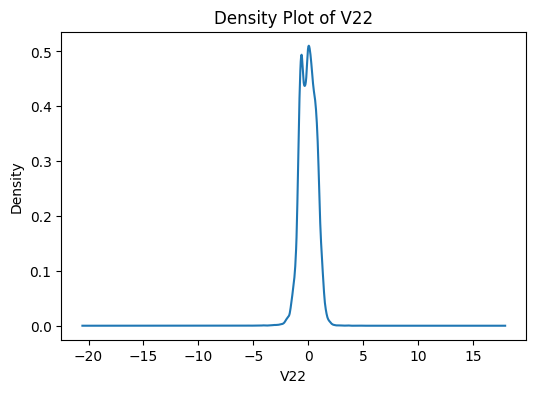

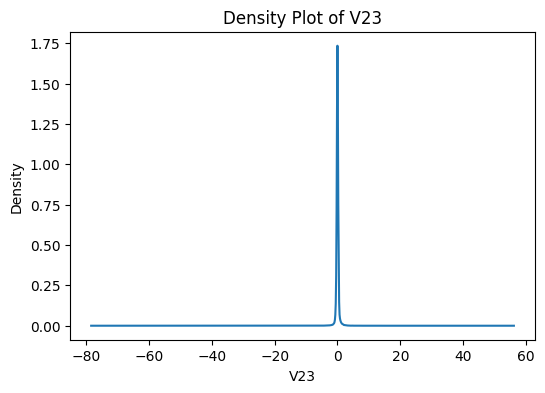

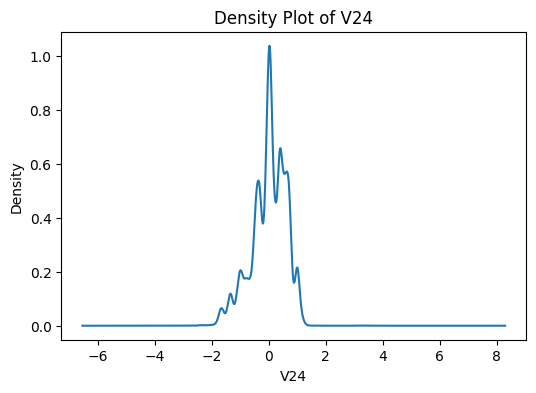

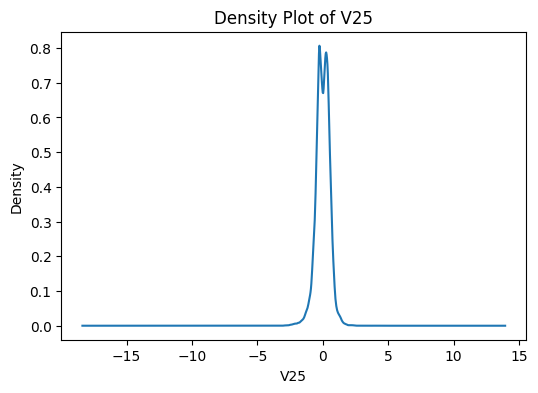

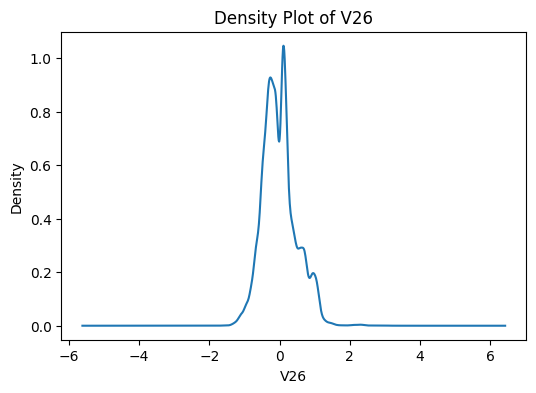

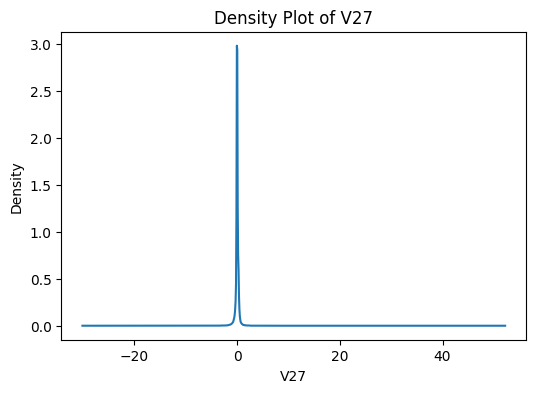

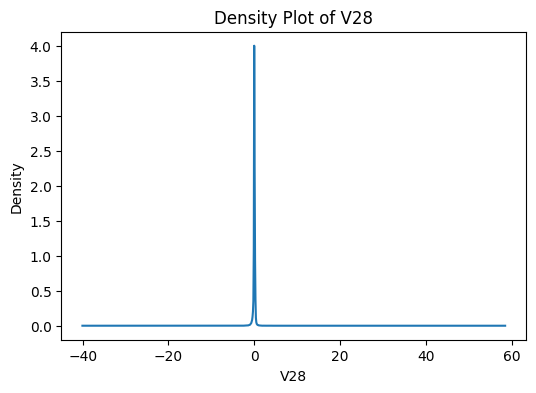

In [24]:
import matplotlib.pyplot as plt

for column in pca_columns:
    bank_data[column].plot(kind='density', figsize=(6, 4), title=f'Density Plot of {column}')
    plt.xlabel(column)
    plt.show()

Even though most of the PCA features shape around 0, some fully don't, to mitigate this we are gonna scale all the PCA features as well.

Shared features

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardize PCA fetaures (V1 to V28)
pca_columns = [f'V{i}' for i in range(1, 29)]
scaler = StandardScaler()
bank_data[pca_columns] = scaler.fit_transform(bank_data[pca_columns])
ecommerce_data[pca_columns] = scaler.transform(ecommerce_data[pca_columns])


Check their distribution after scalling

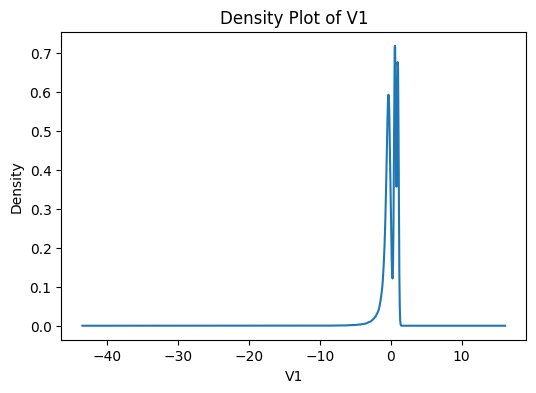

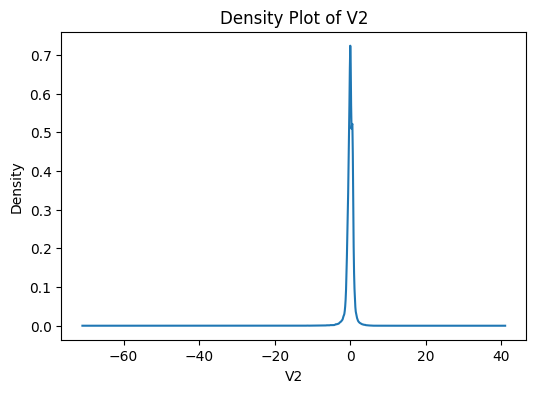

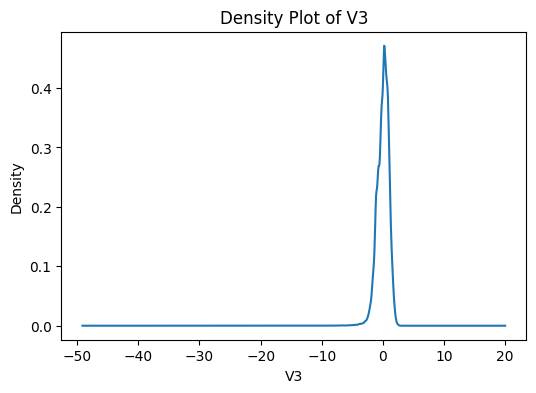

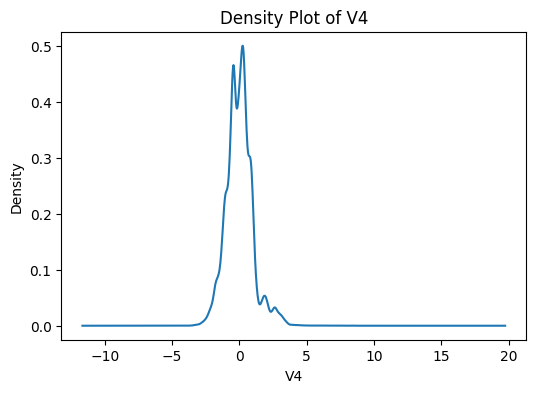

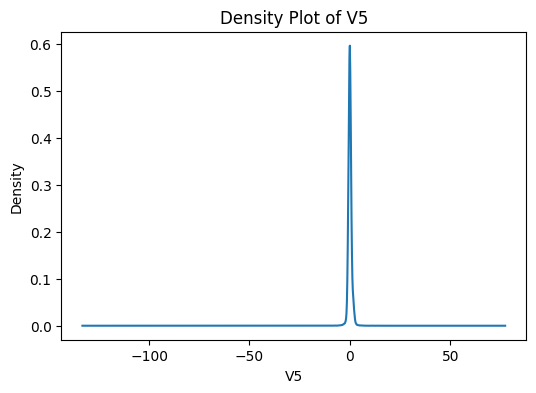

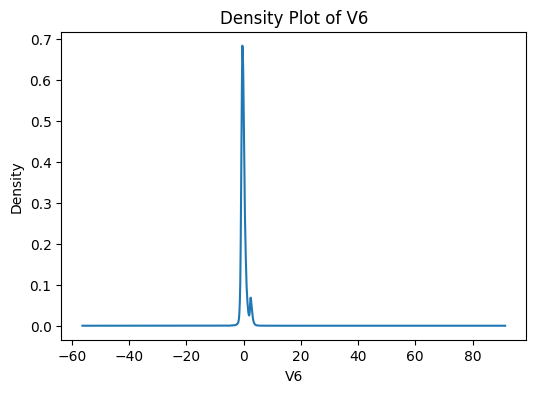

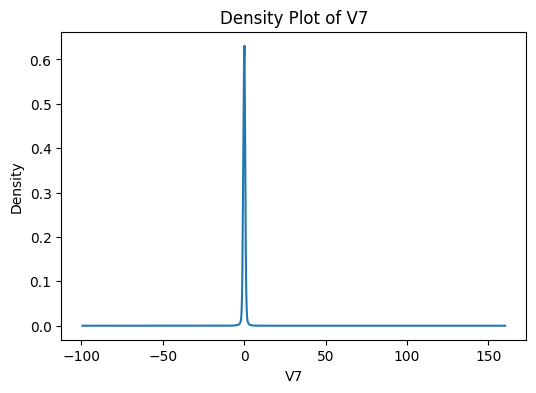

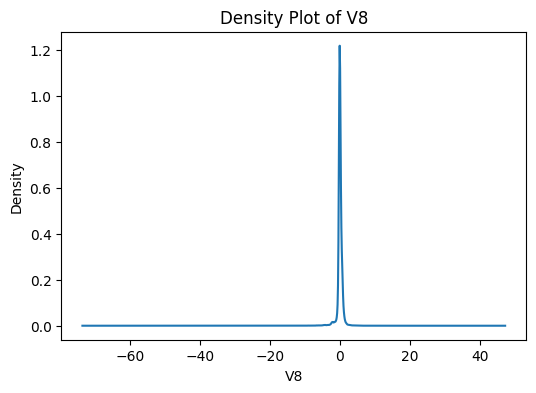

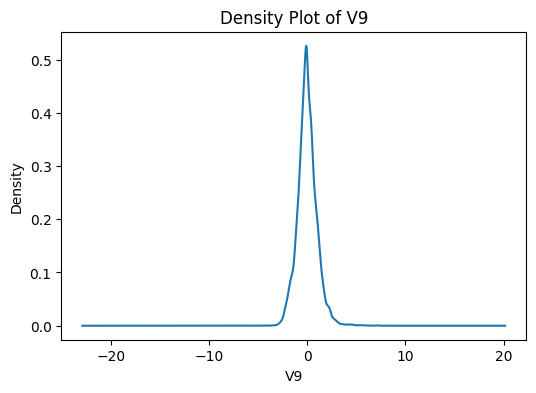

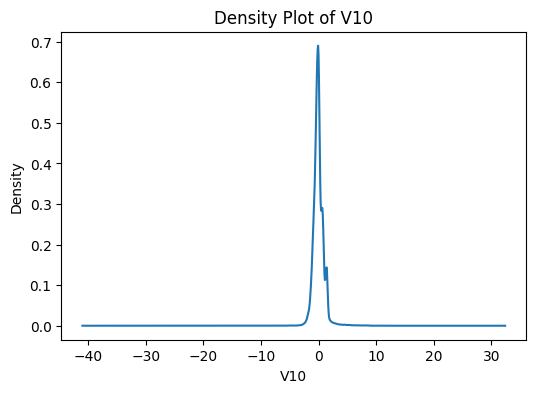

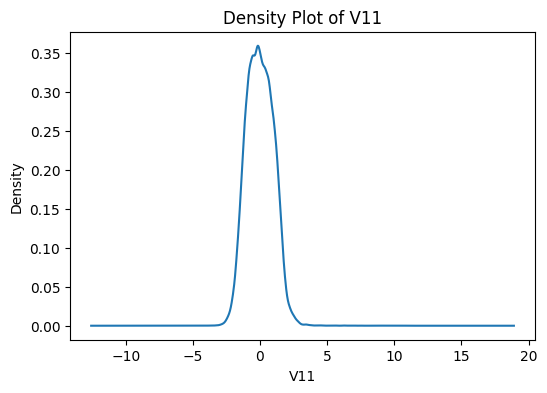

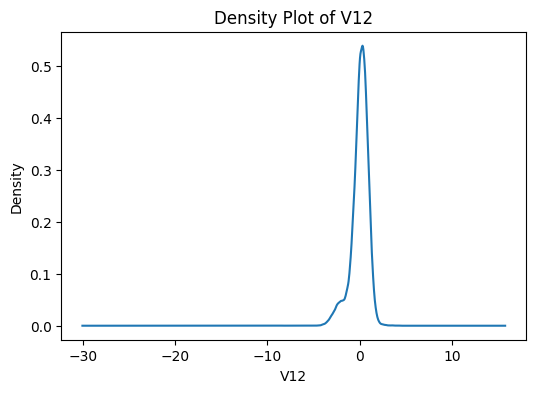

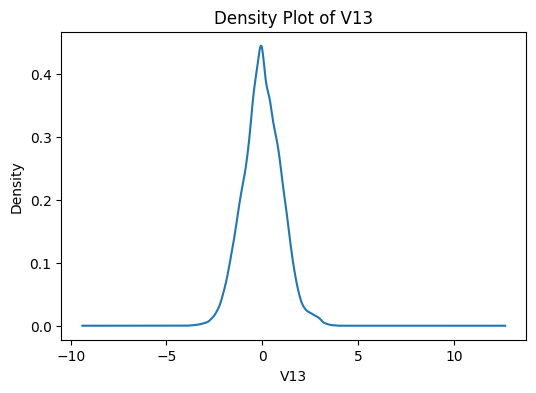

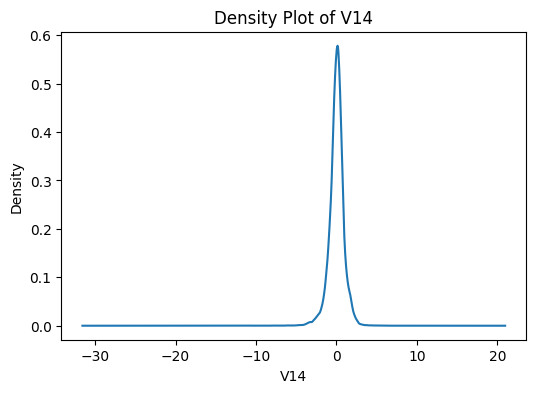

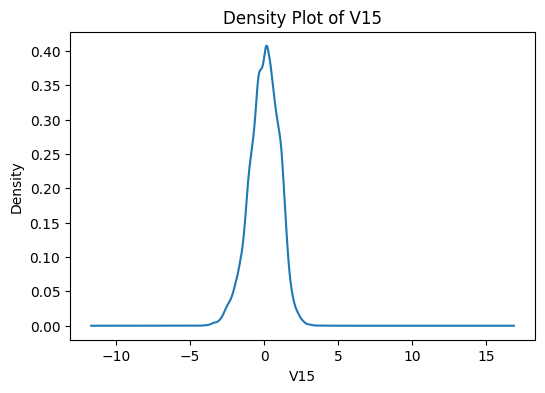

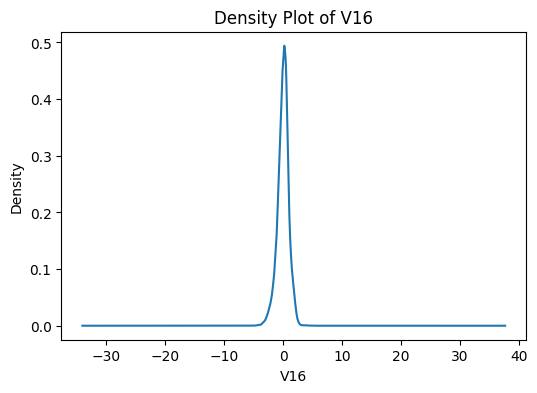

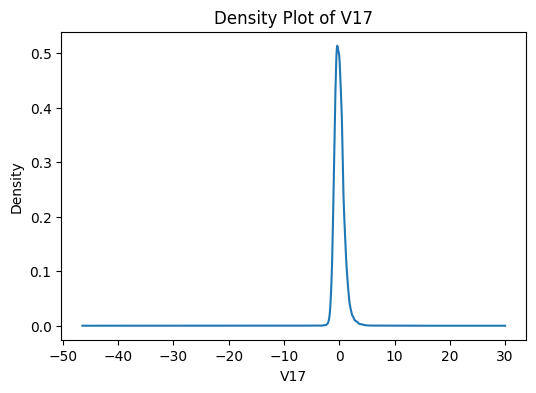

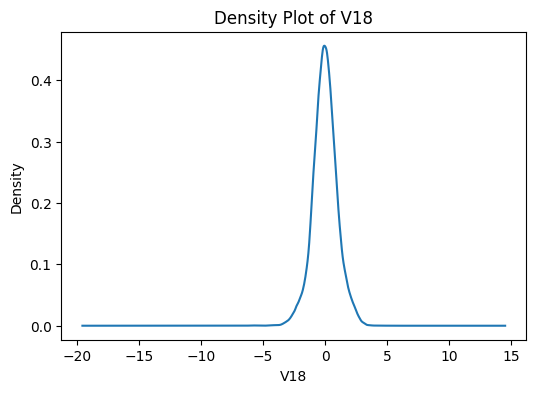

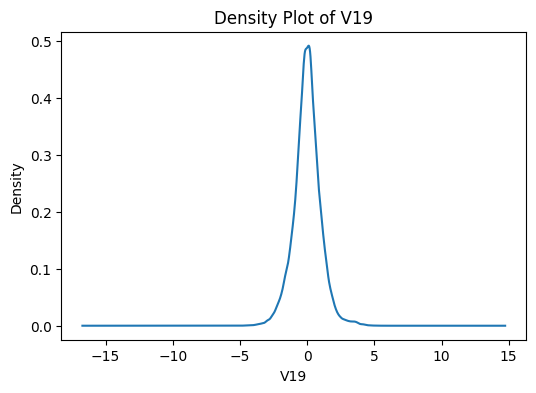

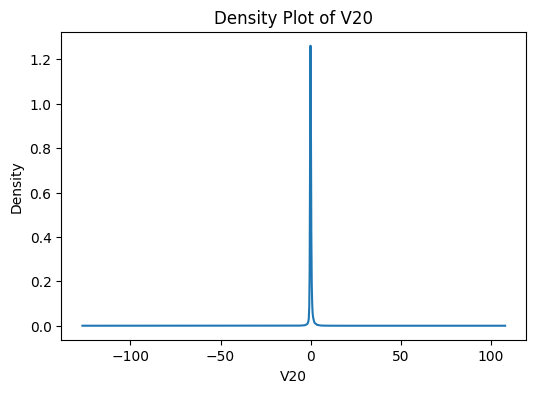

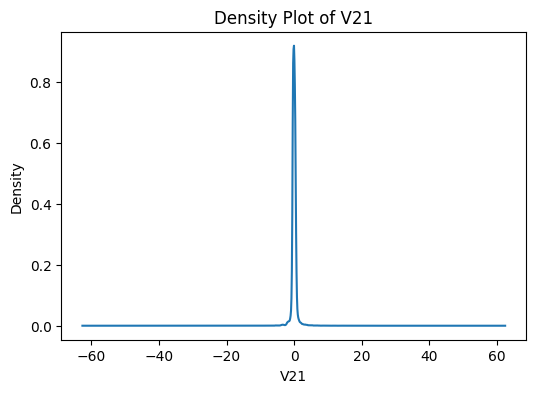

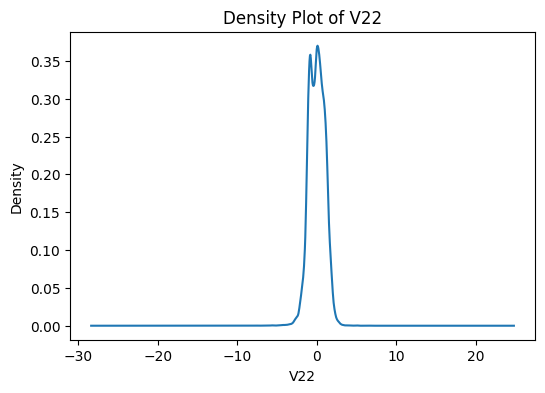

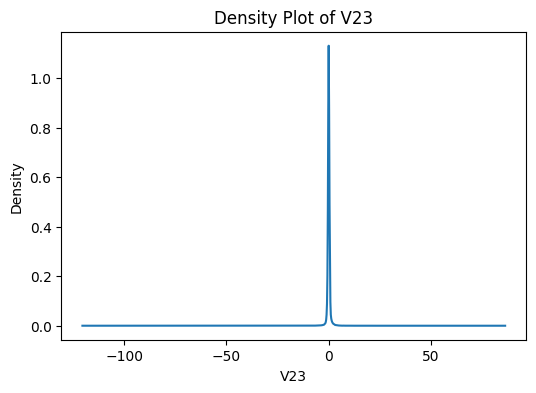

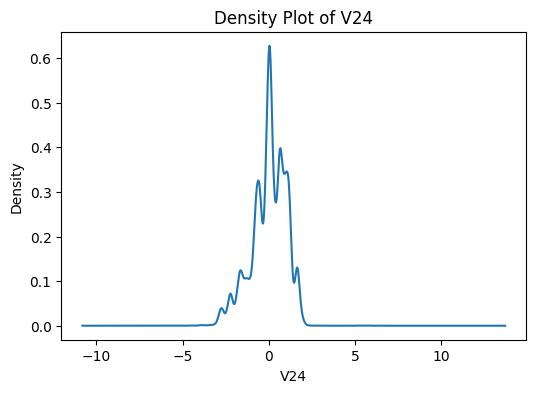

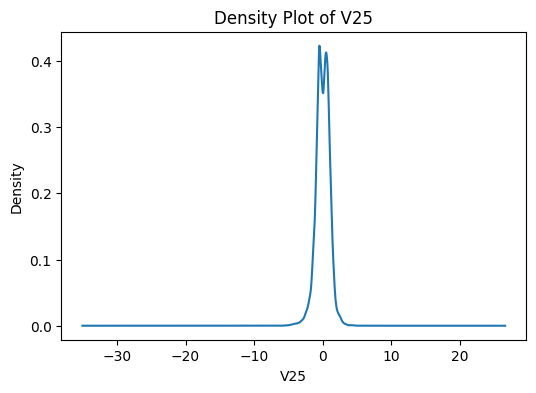

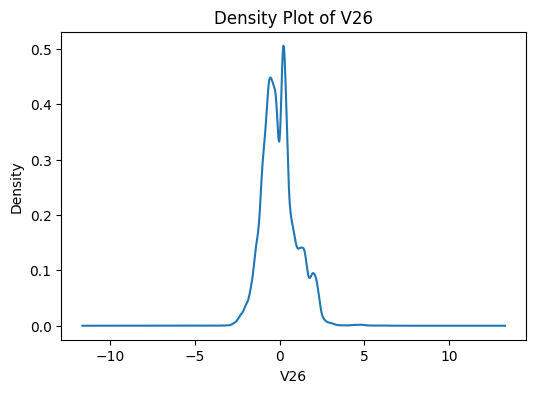

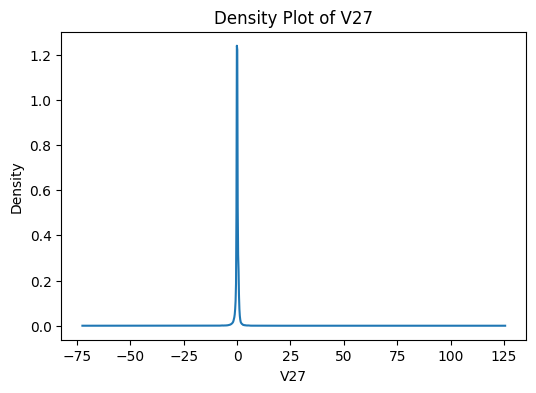

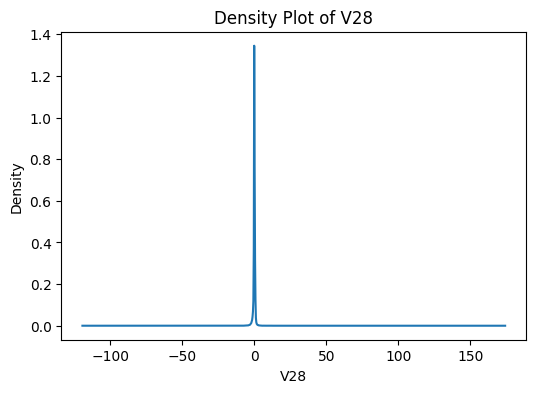

In [27]:
for column in pca_columns:
    bank_data[column].plot(kind='density', figsize=(6, 4), title=f'Density Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [28]:
bank_data[pca_columns].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,1.139230e+05,1.139230e+05,1.139230e+05,1.139230e+05,1.139230e+05,113923.000000,1.139230e+05,1.139230e+05,1.139230e+05,1.139230e+05,...,1.139230e+05,1.139230e+05,1.139230e+05,1.139230e+05,1.139230e+05,1.139230e+05,1.139230e+05,1.139230e+05,1.139230e+05,1.139230e+05
mean,-5.987562e-18,5.987562e-18,-4.790050e-17,1.896061e-17,-1.596683e-17,0.000000,4.989635e-18,3.617485e-18,-1.316016e-17,-4.989635e-18,...,9.480307e-18,8.482380e-18,-6.860748e-18,1.995854e-18,3.991708e-18,2.544714e-17,-1.197512e-17,9.480307e-18,6.736007e-18,-4.989635e-19
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.856003e+01,-4.291396e+01,-3.186405e+01,-3.817175e+00,-8.055675e+01,-19.437680,-3.444059e+01,-4.344641e+01,-1.212235e+01,-2.263989e+01,...,-8.863056e+00,-6.801146e+01,-3.138363e+01,-1.508124e+01,-6.877865e+01,-4.684003e+00,-1.962622e+01,-5.389806e+00,-2.295438e+01,-4.592878e+01
25%,-4.639097e-01,-3.516638e-01,-5.874287e-01,-5.984528e-01,-4.901752e-01,-0.569671,-4.380983e-01,-1.774643e-01,-5.849160e-01,-4.924240e-01,...,-5.603714e-01,-2.645175e-01,-3.135727e-01,-7.458449e-01,-2.454769e-01,-5.849365e-01,-6.022045e-01,-6.785554e-01,-1.681624e-01,-1.562997e-01
50%,7.331149e-03,4.340944e-02,1.184706e-01,-1.601217e-02,-4.276244e-02,-0.202608,3.210382e-02,1.920263e-02,-4.648771e-02,-8.495318e-02,...,6.918881e-03,-7.696815e-02,-3.978218e-02,7.731661e-03,-1.423306e-02,6.890959e-02,3.111657e-02,-1.082546e-01,6.071865e-03,3.634624e-02
75%,6.685011e-01,4.794997e-01,6.779332e-01,5.247582e-01,4.300729e-01,0.294977,4.509741e-01,2.787457e-01,5.445458e-01,4.199241e-01,...,5.653562e-01,1.668267e-01,2.569797e-01,7.277230e-01,2.289607e-01,7.271753e-01,6.704308e-01,5.034517e-01,2.220328e-01,2.366706e-01
max,1.246531e+00,1.302426e+01,2.701847e+00,1.188755e+01,2.464846e+01,54.460775,9.534818e+01,1.706172e+01,9.394631e+00,1.404075e+01,...,6.868207e+00,4.919914e+01,3.113288e+01,1.147236e+01,3.458443e+01,7.567756e+00,1.116328e+01,7.070430e+00,7.604674e+01,1.007598e+02


Mean: The mean for all features is close to 0 (within floating-point precision limits). This is expected and aligns with standardization.

Standard Deviation: The standard deviation for all features is close to 1. This ensures that all features contribute equally during model training.

Min/Max: The ranges of some features still show extreme values. For example:
V6 has a maximum of 54.46 and V7 has a maximum of 95.35.
These values are much higher than the typical range (-3 to +3) expected for standardized data, indicating the presence of outliers.

If outliers have big impact on the model then might need to add RobustScaler instead of StandardScaler.

In [26]:
# Standardize Time and Amount
scaler = StandardScaler()
bank_data[['Time', 'Amount']] = scaler.fit_transform(bank_data[['Time', 'Amount']])
ecommerce_data[['Time', 'Amount']] = scaler.transform(ecommerce_data[['Time', 'Amount']])

We do not need to add any sort of standarization in Class, Card Types, Card IDs features.

Class --> is a label to detect if this transaction is fraudulant or not.

Card ID --> is an identifier which was int object but to hide the Card data to comply with PCI DSS complience we sort of Hashed it so this does not need or we cannot scale a string object.

Card Type --> is a String object and does not need to be scaled.